In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

In [36]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [37]:
train_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [38]:
train_data.isnull().sum().tail()

Engine         36
Power          36
Seats          42
New_Price    5195
Price           0
dtype: int64

In [39]:
train_data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [42]:
train_data = train_data.iloc[:, 1:]
train_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [43]:
train_data['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [48]:
train_data['Mileage'] = train_data['Mileage'].str.replace(' kmpl', '')

In [49]:
train_data['Mileage'] = train_data['Mileage'].str.replace(' km/kg', '')

In [54]:
train_data['Mileage'] = train_data['Mileage'].astype(float)

In [55]:
train_data['Mileage'].unique()

array([26.6 , 19.67, 18.2 , 20.77, 15.2 , 21.1 , 23.08, 11.36, 20.54,
       22.3 , 21.56, 16.8 , 25.2 , 12.7 ,  0.  , 13.5 , 25.8 , 28.4 ,
       20.45, 14.84, 22.69, 23.65, 13.53, 18.5 , 14.4 , 20.92, 17.5 ,
       12.8 , 19.01, 14.53, 11.18, 12.4 , 16.09, 14.  , 24.3 , 18.15,
       11.74, 22.07, 19.7 , 25.4 , 25.32, 14.62, 14.28, 14.9 , 11.25,
       24.4 , 16.55, 17.11, 22.9 , 17.8 , 18.9 , 15.04, 25.17, 20.36,
       13.29, 13.68, 20.  , 15.8 , 25.  , 16.4 , 24.52, 22.1 ,  8.5 ,
       15.1 , 16.95, 19.64, 16.5 , 18.53, 17.57, 18.  , 23.2 , 16.73,
       17.  , 13.  , 17.68, 22.7 , 16.2 , 15.26, 23.  , 19.83, 14.94,
       17.71, 14.74, 16.  , 22.32, 12.99, 23.3 , 19.15, 10.8 , 15.  ,
       22.  , 21.9 , 12.05, 11.7 , 21.21, 20.73, 24.07, 19.  , 20.58,
       19.27, 11.5 , 18.6 , 21.14, 11.05, 21.76,  7.81, 21.66, 17.2 ,
       20.63, 19.4 , 14.8 , 26.  , 20.4 , 21.5 , 15.3 , 17.9 , 16.6 ,
       22.54, 25.44, 13.7 , 22.48, 12.9 , 19.98, 21.4 , 19.81, 15.4 ,
       25.47, 19.87,

In [56]:
train_data['Mileage'].dtype

dtype('float64')

In [57]:
train_data['Mileage'] = np.nan_to_num(train_data['Mileage'], nan=np.nanmean(train_data['Mileage']))

In [58]:
train_data['Mileage'].isnull().sum()

0

In [61]:
train_data['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [62]:
train_data['Engine'] = train_data['Engine'].str.replace(' CC', '')

In [63]:
train_data['Engine'] = train_data['Engine'].astype(float)

In [64]:
train_data['Engine'].unique()

array([ 998., 1582., 1199., 1248., 1968.,  814., 1461., 2755., 1598.,
       1462., 1497., 2179., 2477., 1498., 2143., 1995., 1984., 1197.,
       2494., 1798., 2696., 2698., 1061., 1198., 2987.,  796.,  624.,
       1999., 1991., 2694., 1120., 2498.,  799., 2393., 1399., 1796.,
       2148., 1396., 1950., 4806., 1998., 1086., 1193., 2982., 1493.,
       2967., 2993., 1196., 1799., 2497., 2354., 1373., 2996., 1591.,
       2894., 5461., 1595.,  936., 1997.,   nan, 1896., 1390., 1364.,
       2199.,  993.,  999., 1405., 2956., 1794.,  995., 2496., 1599.,
       2400., 1495., 2523.,  793., 4134., 1596., 1395., 2953., 1586.,
       2362., 1496., 1368., 1298., 1956., 1299., 3498., 2835., 1150.,
       3198., 1343., 1499., 1186., 1590., 2609., 2499., 2446., 1978.,
       2360., 3436., 2198., 4367., 2706., 1422., 2979., 1969., 1489.,
       2489., 1242., 1388., 1172., 2495., 1194., 3200., 1781., 1341.,
       2773., 3597., 1985., 2147., 1047., 2999., 2995., 2997., 1948.,
       2359., 4395.,

In [65]:
train_data['Engine'].dtype

dtype('float64')

In [66]:
train_data['Engine'] = np.nan_to_num(train_data['Engine'], nan=np.nanmean(train_data['Engine']))

In [67]:
train_data['Engine'].isnull().sum()

0

In [68]:
train_data['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [69]:
train_data['Power'] = train_data['Power'].str.replace(' bhp', '')

In [70]:
train_data['Power'] = train_data['Power'].replace('null', np.nan)

In [71]:
train_data['Power'] = train_data['Power'].astype(float)

In [72]:
train_data['Power'].unique()

array([ 58.16 , 126.2  ,  88.7  ,  88.76 , 140.8  ,  55.2  ,  63.1  ,
       171.5  , 103.6  ,  74.   , 103.25 , 116.3  , 187.7  , 115.   ,
       175.56 ,  98.6  ,  83.8  , 167.62 , 190.   ,  88.5  , 177.01 ,
        80.   ,  67.1  , 102.   , 108.45 , 138.1  , 184.   , 179.5  ,
       103.5  ,  64.   ,  82.   , 254.8  ,  73.9  ,  46.3  ,  37.5  ,
        77.   ,  82.9  , 149.92 , 138.03 , 112.2  , 163.7  ,  71.   ,
       105.   , 174.33 ,  75.   , 103.2  ,  53.3  ,  78.9  , 147.6  ,
       147.8  ,  68.   , 186.   , 170.   ,  69.   , 140.   ,  78.   ,
       194.   , 500.   , 108.5  ,  86.8  , 187.74 ,     nan, 132.   ,
        86.7  ,  73.94 , 117.3  , 218.   , 168.5  ,  89.84 , 110.   ,
        90.   ,  82.85 ,  67.   , 241.4  ,  35.   , 270.9  , 126.32 ,
        73.   , 130.   , 100.6  , 150.   ,  75.94 , 215.   , 107.3  ,
        37.48 , 120.   , 178.   , 152.   ,  91.1  ,  85.8  , 362.07 ,
       121.3  , 143.   ,  81.8  , 171.   ,  76.8  , 103.52 , 444.   ,
       362.9  ,  67.

In [73]:
train_data['Power'].dtype

dtype('float64')

In [74]:
train_data['Power'] = np.nan_to_num(train_data['Power'], nan=np.nanmean(train_data['Power']))

In [75]:
train_data['Power'].isnull().sum()

0

In [76]:
train_data['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [77]:
train_data['Seats'] = train_data['Seats'].replace('null', np.nan)

In [78]:
train_data['Seats'] = train_data['Seats'].astype(float)

In [79]:
train_data['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [80]:
train_data['Seats'].dtype

dtype('float64')

In [81]:
train_data['Seats'] = np.nan_to_num(train_data['Seats'], nan=np.nanmean(train_data['Seats']))

In [82]:
train_data['Seats'].isnull().sum()

0

In [83]:
train_data['New_Price'].unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

In [84]:
train_data['New_Price'] = train_data['New_Price'].replace('null', np.nan)

In [85]:
train_data['New_Price'] = train_data['New_Price'].str.replace(' Lakh', '')

In [87]:
train_data['New_Price'] = train_data['New_Price'].str.replace(' Cr', '')

In [88]:
train_data['New_Price'] = train_data['New_Price'].astype(float)

In [89]:
train_data['New_Price'].unique()

array([  nan,  8.61, 21.  , 10.65, 32.01, 47.87, 10.57, 12.33, 11.12,
       23.64, 18.64, 19.34, 49.14, 11.81, 16.65,  6.67,  6.45,  6.41,
       27.  ,  5.13, 54.43,  9.51,  9.96, 14.44,  4.53, 95.04, 13.49,
        1.28, 60.88,  7.39, 69.47,  8.78, 12.74, 10.52, 11.98,  8.54,
       33.58,  9.12,  5.29, 44.28, 20.74, 11.74, 25.52, 14.07, 95.13,
        8.34,  8.85, 25.4 , 16.67, 79.43,  6.62,  1.04, 58.67, 28.37,
        4.48, 72.64, 36.15, 44.59, 12.  , 14.65, 53.72, 33.91, 12.51,
        9.74, 95.38, 60.59, 11.28, 11.48, 11.26, 43.65, 62.07, 86.97,
        1.  ,  4.74, 14.84, 49.49, 48.18, 12.34, 15.38, 19.21, 22.95,
       11.15, 10.32, 28.05, 59.77, 15.86, 19.43, 42.12, 16.95, 15.45,
        7.87,  4.7 , 15.02, 12.56, 11.33, 26.45, 10.34,  7.46, 11.85,
       10.41,  5.57, 42.48, 16.04,  9.1 ,  7.65, 13.74,  5.72, 21.33,
       78.76,  4.29, 10.04, 11.67,  8.56,  4.78,  6.14,  7.3 ,  4.37,
        4.98, 15.29, 24.26, 75.12,  9.53, 34.6 , 52.26, 70.43,  4.8 ,
       12.12, 19.37,

In [90]:
train_data['New_Price'].dtype

dtype('float64')

In [91]:
train_data['New_Price'] = np.nan_to_num(train_data['New_Price'], nan=np.nanmean(train_data['New_Price']))

In [92]:
train_data['New_Price'].isnull().sum()

0

In [95]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB


In [96]:
train_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [97]:
train_data.isnull().sum().tail()

Engine       0
Power        0
Seats        0
New_Price    0
Price        0
dtype: int64

## Data Visualization

(0.0, 160.0)

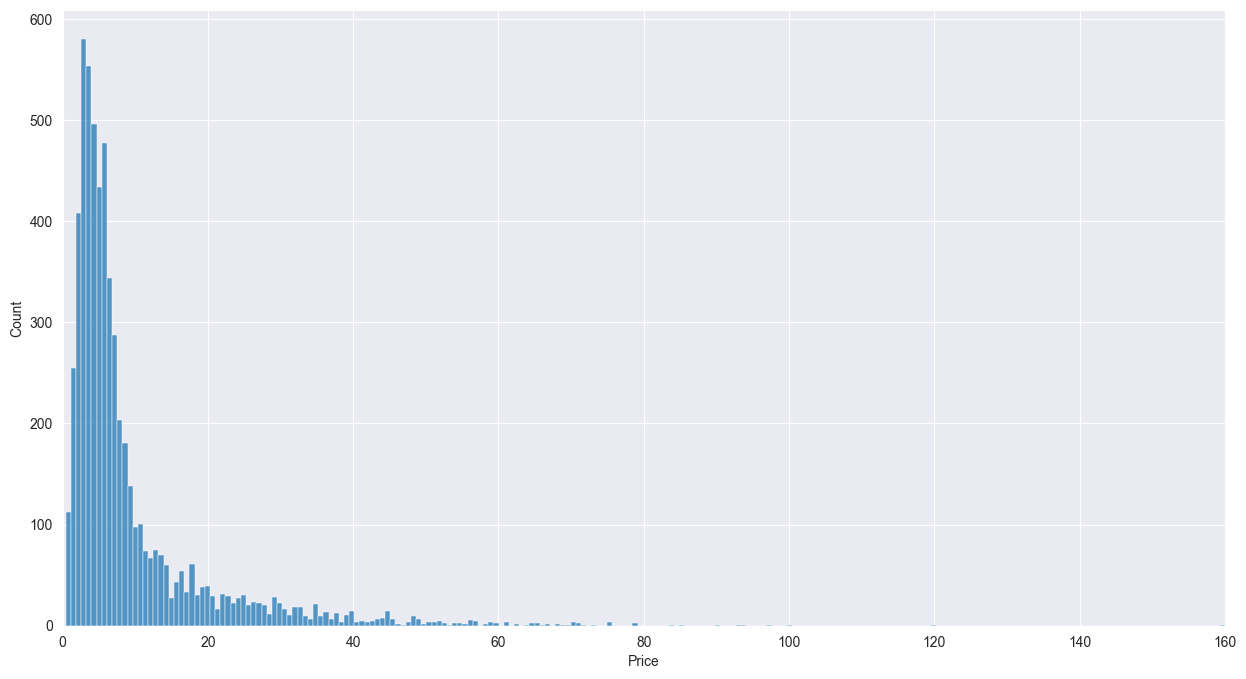

In [98]:
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(train_data['Price'])
plt.xlim([0,160])

<Axes: xlabel='Year', ylabel='Count'>

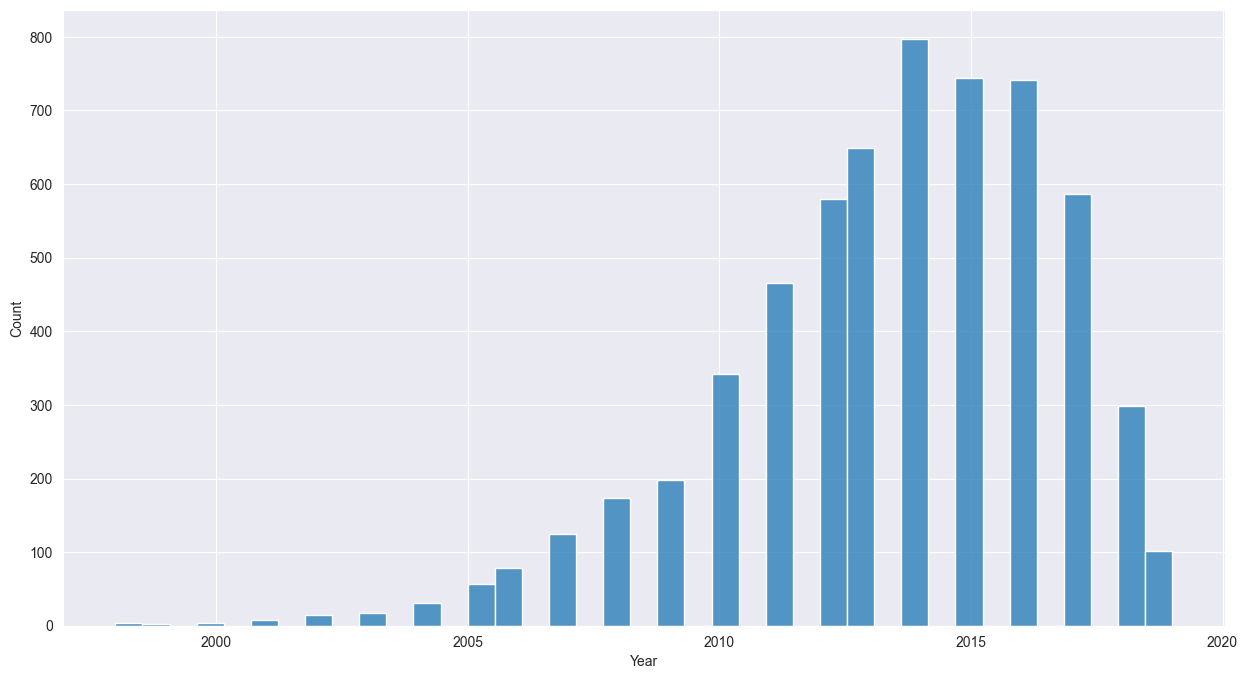

In [99]:
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(train_data['Year'])

<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

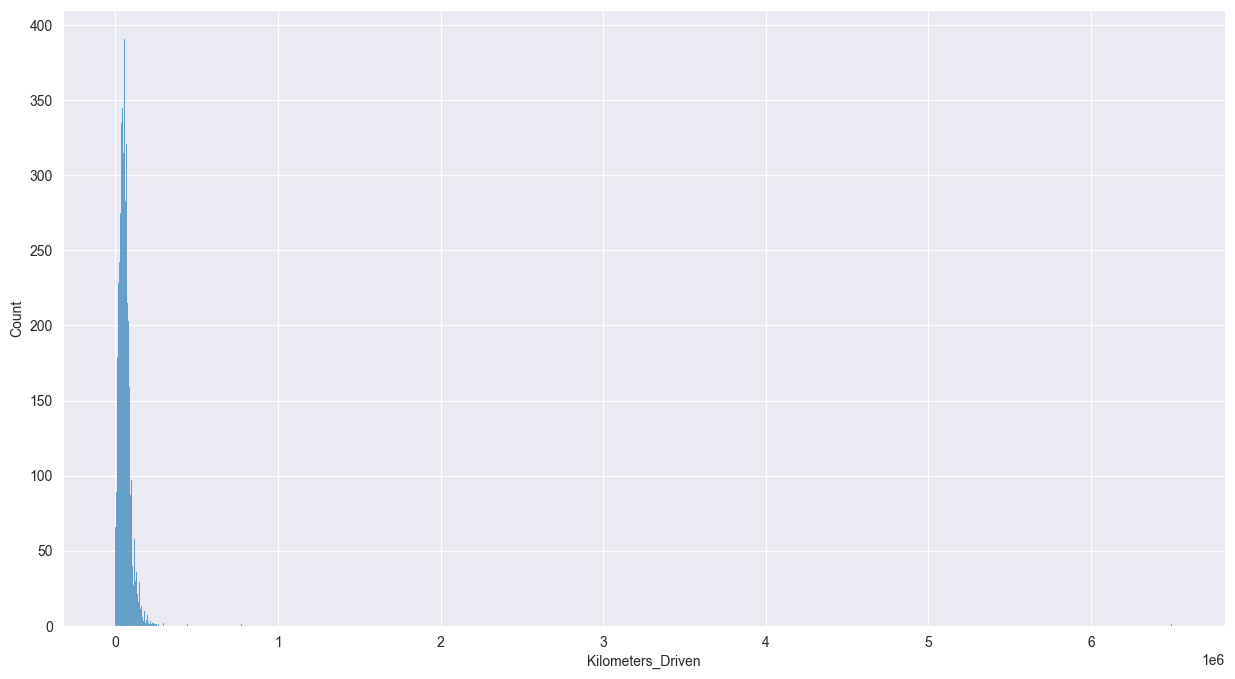

In [100]:
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(train_data['Kilometers_Driven'])

<Axes: xlabel='Mileage', ylabel='Count'>

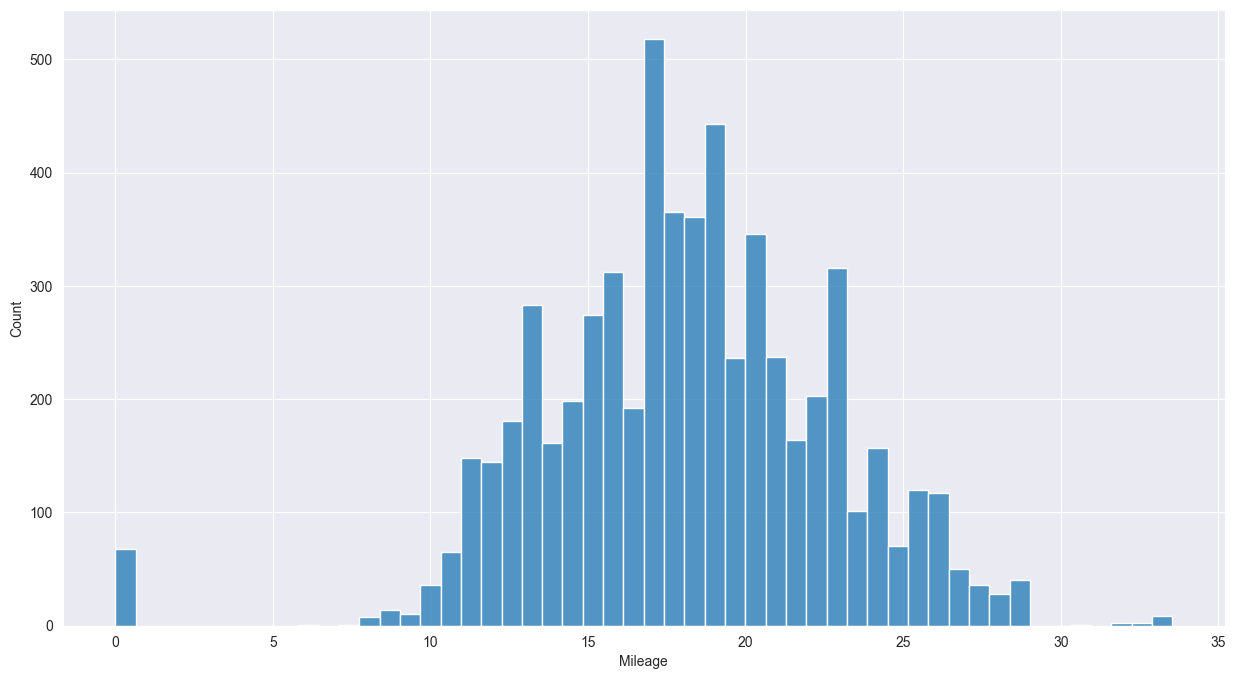

In [101]:
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(train_data['Mileage'])

<Axes: xlabel='Engine', ylabel='Count'>

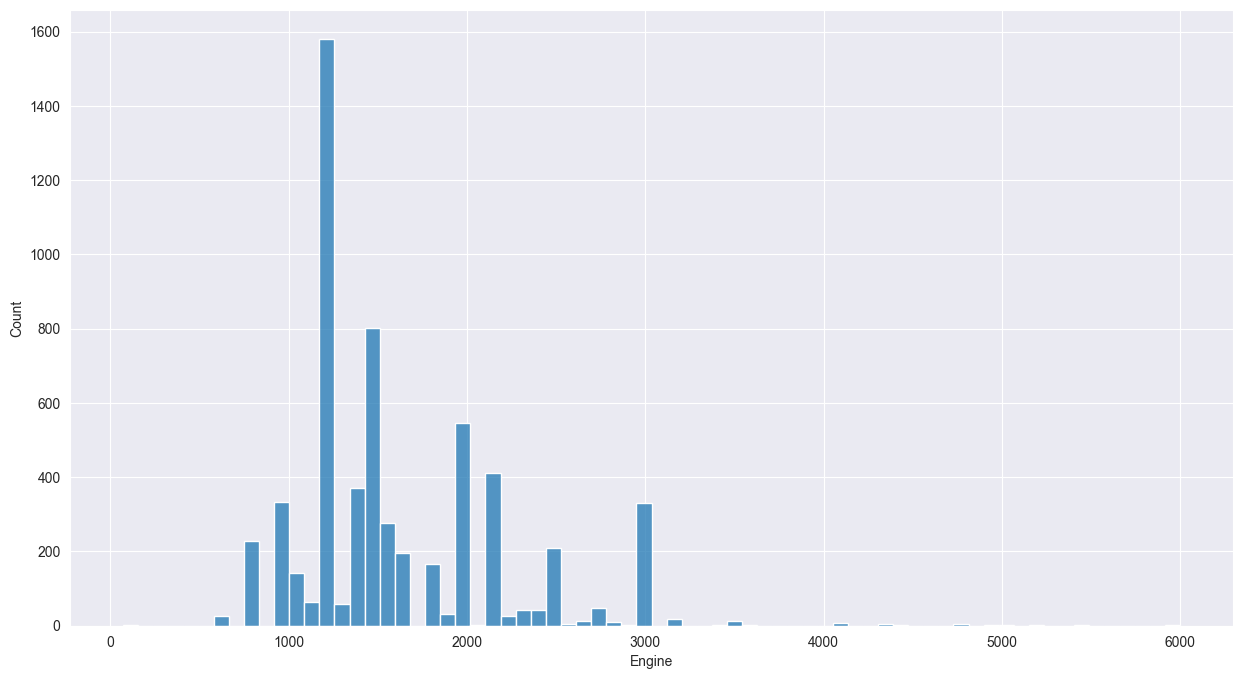

In [102]:
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(train_data['Engine'])

<Axes: xlabel='Power', ylabel='Count'>

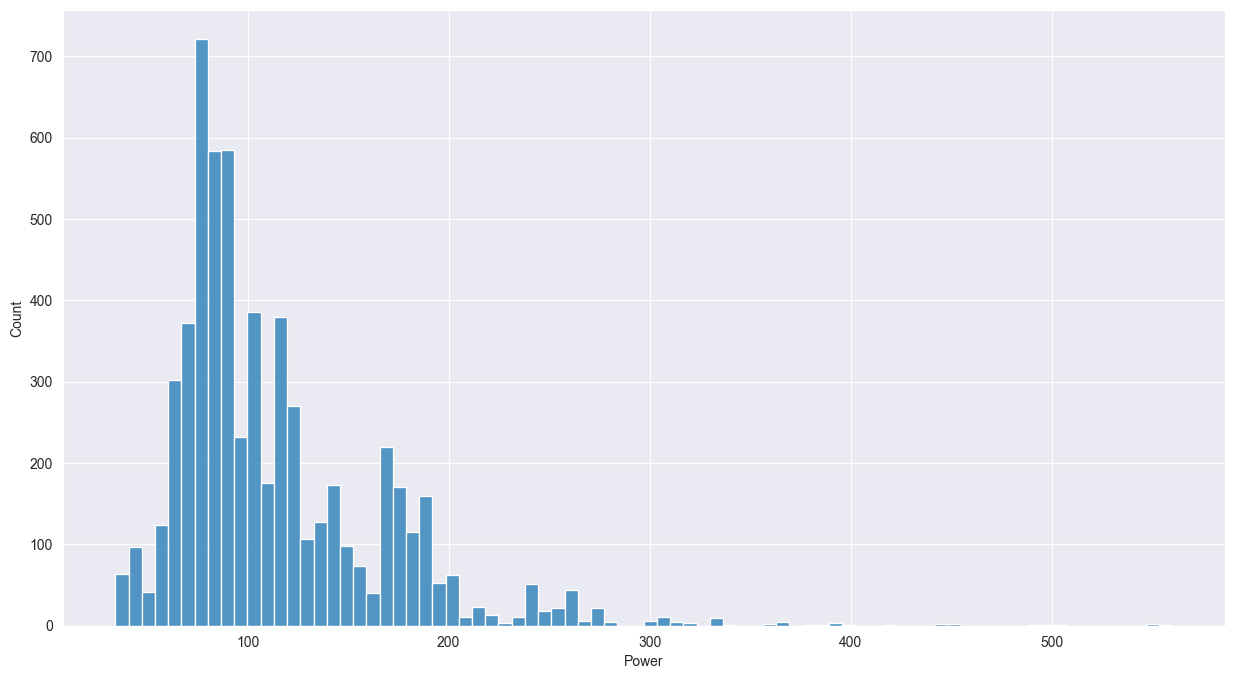

In [103]:
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(train_data['Power'])

<Axes: xlabel='Seats', ylabel='Count'>

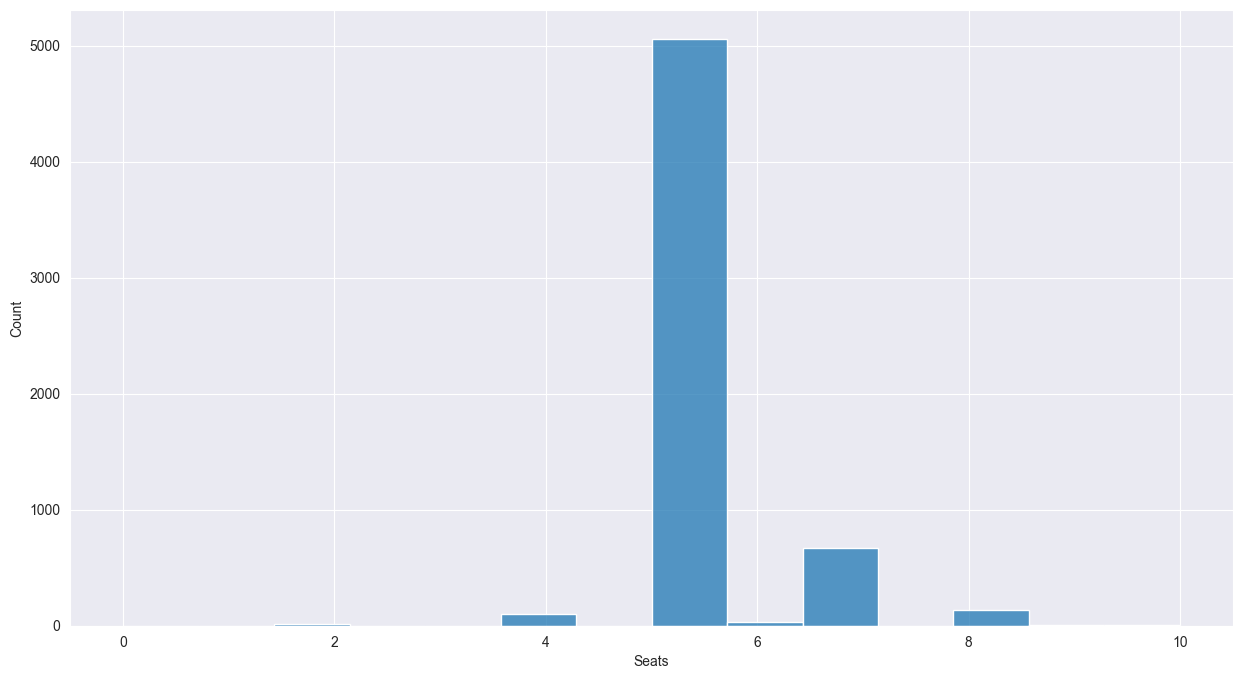

In [104]:
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(train_data['Seats'])

<Axes: xlabel='New_Price', ylabel='Count'>

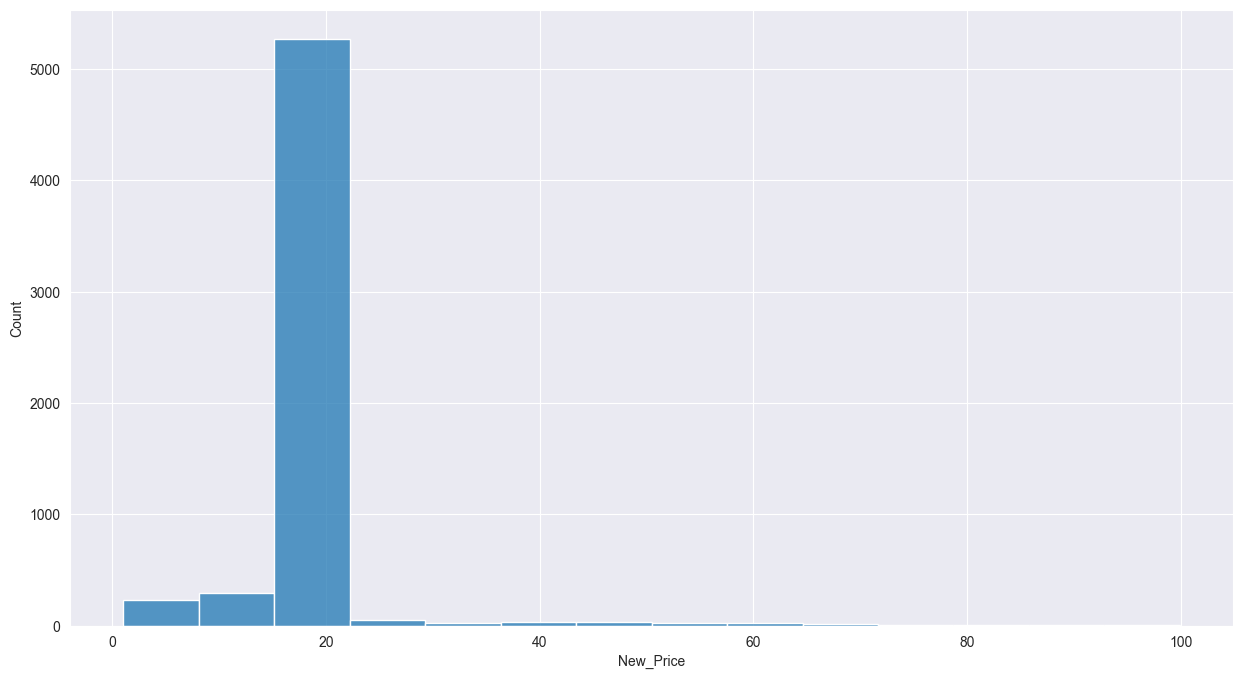

In [105]:
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(train_data['New_Price'])

<Axes: xlabel='Price', ylabel='Count'>

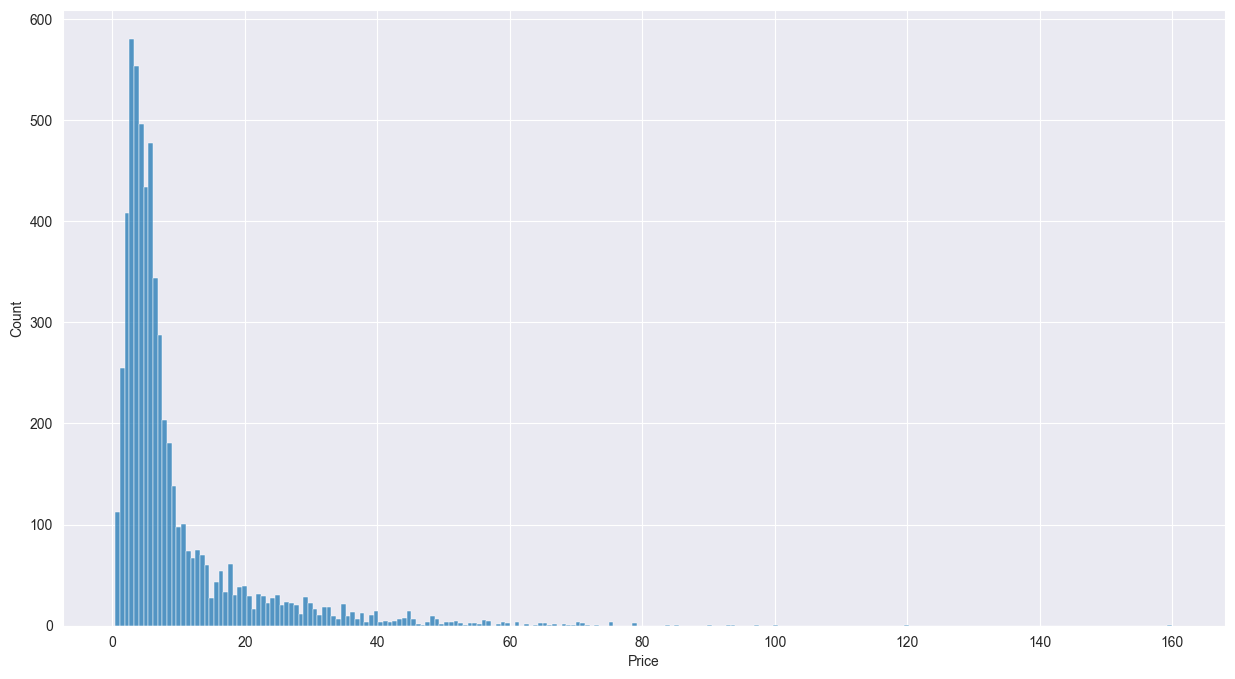

In [106]:
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(train_data['Price'])

<Axes: xlabel='Year', ylabel='Price'>

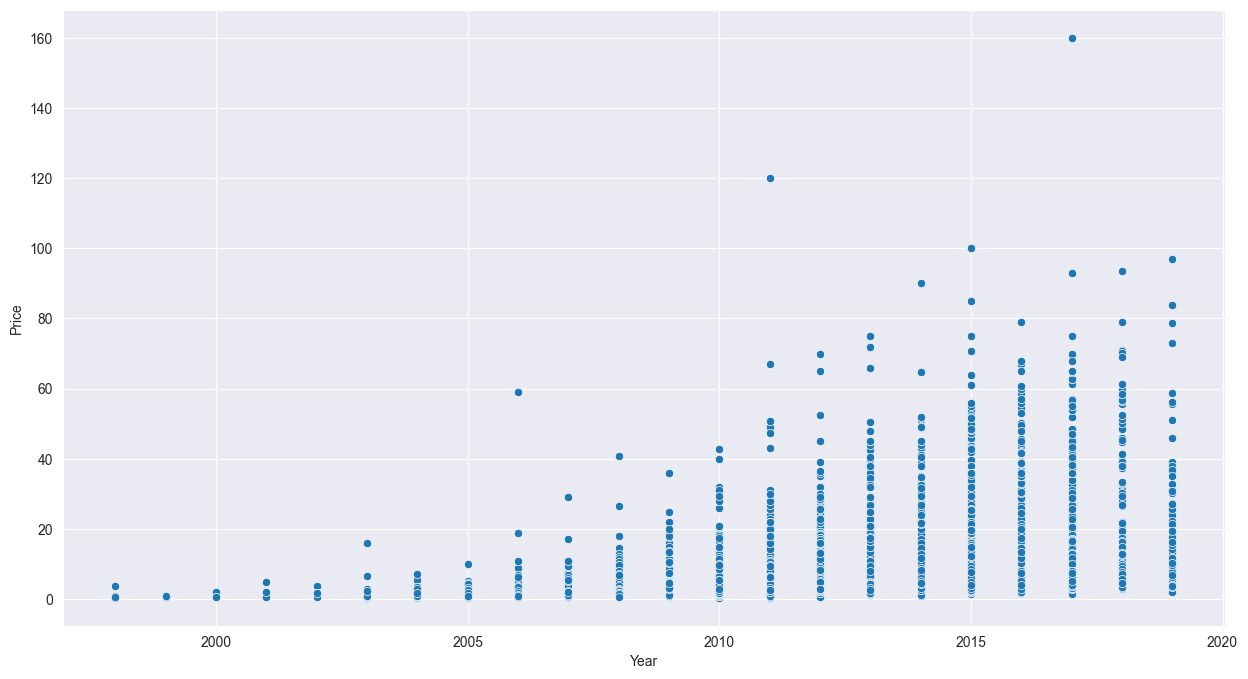

In [107]:
f, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x='Year', y='Price', data=train_data)

<Axes: xlabel='Kilometers_Driven', ylabel='Price'>

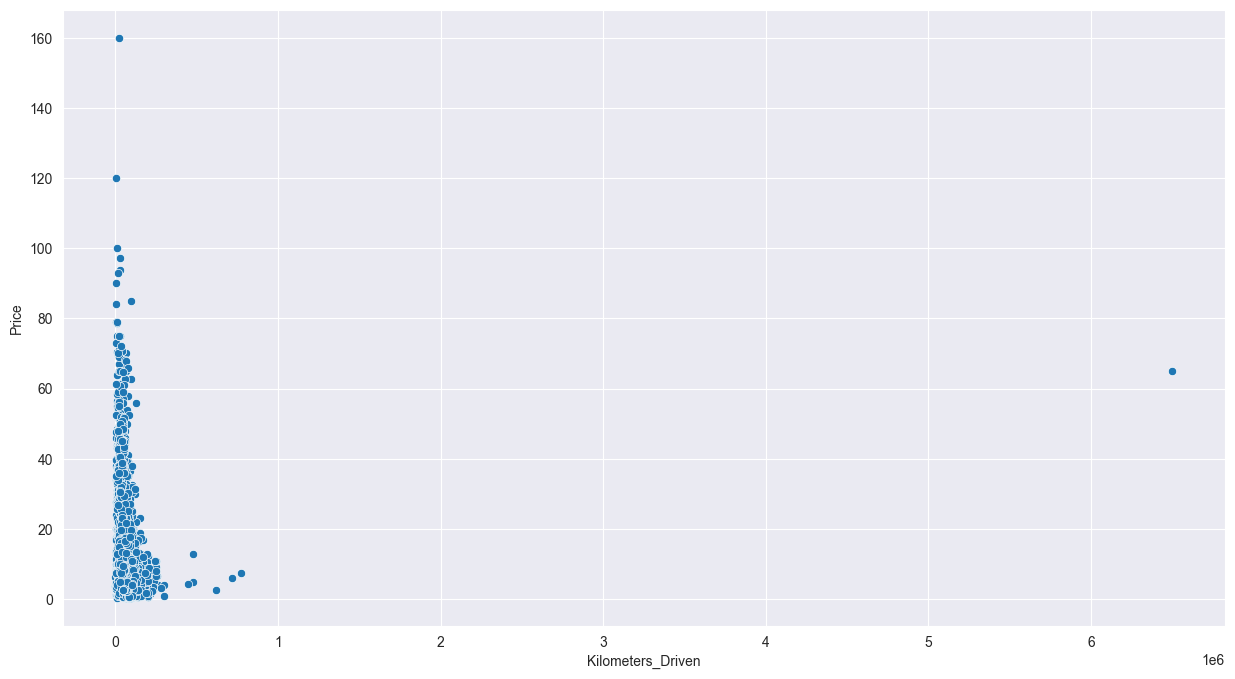

In [108]:
f, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x='Kilometers_Driven', y='Price', data=train_data)

<Axes: xlabel='Mileage', ylabel='Price'>

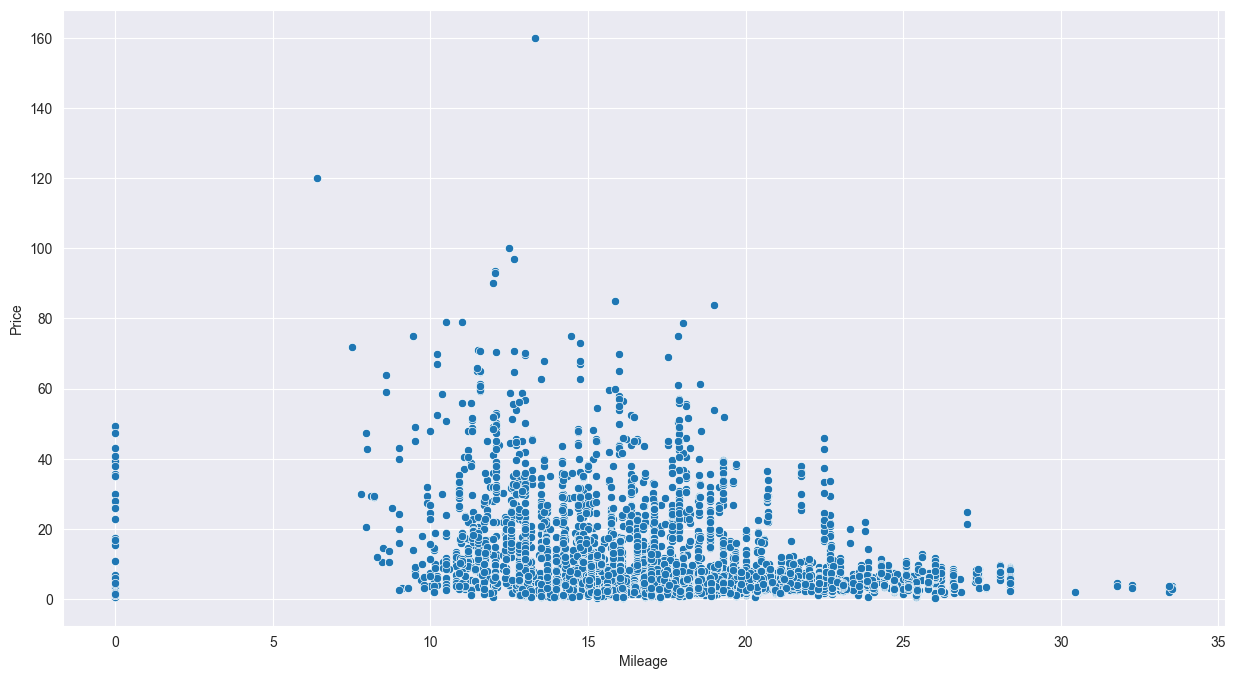

In [109]:
f, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x='Mileage', y='Price', data=train_data)

<Axes: xlabel='Engine', ylabel='Price'>

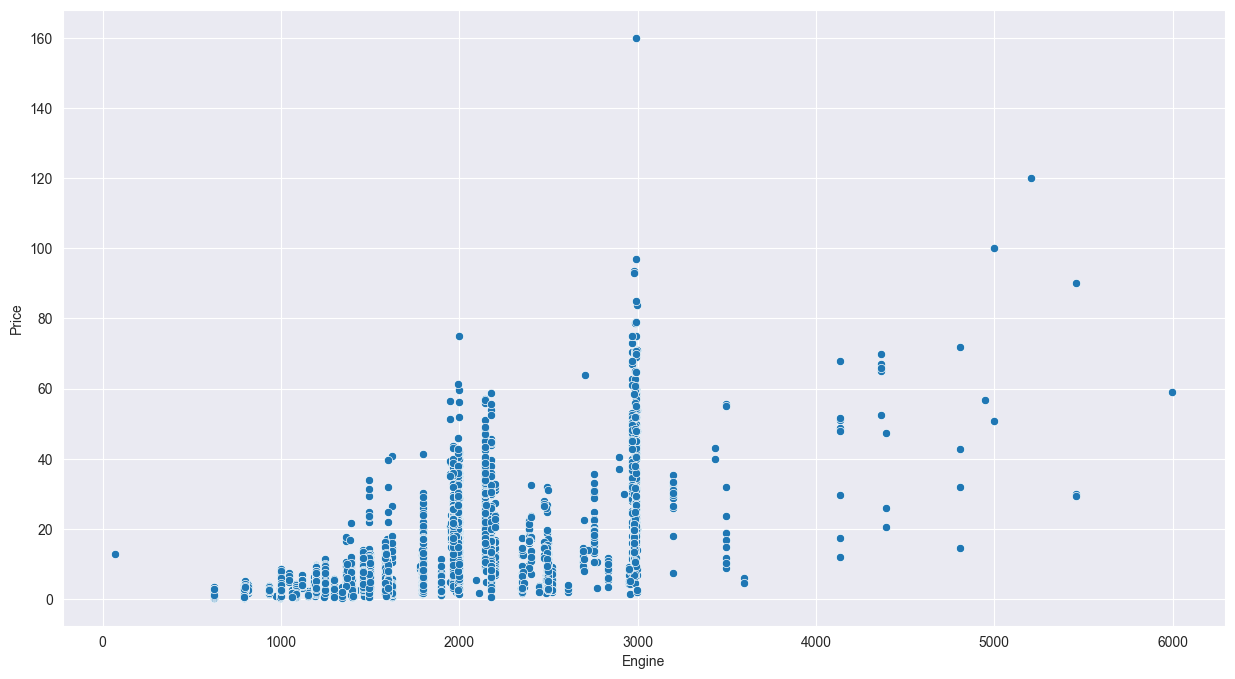

In [110]:
f, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x='Engine', y='Price', data=train_data)

<Axes: xlabel='Power', ylabel='Price'>

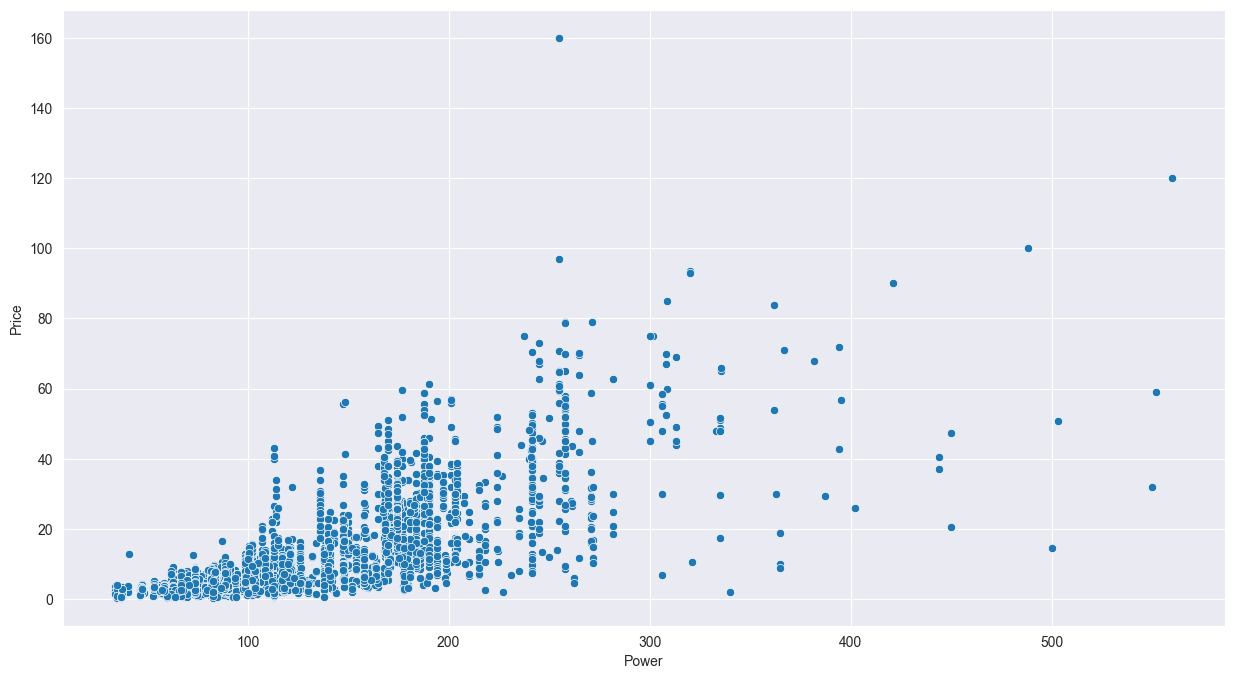

In [111]:
f, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x='Power', y='Price', data=train_data)